# Second-level function signatures

Subdivide clusters 4 (centers) and 0

In [3]:
import dask.dataframe
import pandas as pd
import numpy as np

from clustergram import Clustergram

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve

In [5]:
data = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/function/standardized/")
data = data.drop(columns=["keep_q1", "keep_q2", "keep_q3"])
%time data = data.compute()
data

CPU times: user 25 s, sys: 28.4 s, total: 53.3 s
Wall time: 44.8 s


population_q1  population_q2  population_q3  \
hindex                                                          
c000e109777t0000      -0.206314       0.365497       0.291477   
c000e109777t0001      -0.208114       0.364186       0.274707   
c000e109777t0002      -0.142215       0.414750       0.298747   
c000e109777t0003      -0.080063       0.383735       0.286717   
c000e109777t0004      -0.114962       0.413013       0.298597   
...                         ...            ...            ...   
c102e634855t0000      -0.772446      -0.547355      -0.368144   
c102e634854t0000      -0.865883      -0.694259      -0.458359   
c102e634847t0000      -0.772446      -0.547355      -0.368144   
c102e634850t0000      -0.850124      -0.665683      -0.441754   
c102e614920t0000      -0.791901      -0.572008      -0.399926   

                  night_lights_q1  night_lights_q2  night_lights_q3  \
hindex                                                                
c000e109777t0000        -0.409151        -0.446148        -0.456031   
c000e109777t0001        -0.385136        -0.411700        -0.456031   
c000e109777t0002        -0.404727        -0.431615        -0.450650   
c000e109777t0003        -0.420736        -0.446148        -0.456031   
c000e109777t0004        -0.409151        -0.446148        -0.456031   
...                           ...              ...              ...   
c102e634855t0000        -0.715754        -0.701275        -0.645591   
c102e634854t0000        -0.730629        -0.743258        -0.696025   
c102e634847t0000        -0.715754        -0.701275        -0.645591   
c102e634850t0000        -0.726603        -0.735184        -0.690808   
c102e614920t0000        -0.715938        -0.699391        -0.645591   

                  A, B, D, E. Agriculture, energy and water_q1  \
hindex                                                           
c000e109777t0000                                     -0.843645   
c000e109777t0001                                     -0.971278   
c000e109777t0002                                     -0.891030   
c000e109777t0003                                     -0.854549   
c000e109777t0004                                     -0.887856   
...                                                        ...   
c102e634855t0000                                      0.011376   
c102e634854t0000                                      0.219933   
c102e634847t0000                                      0.011376   
c102e634850t0000                                      0.194017   
c102e614920t0000                                      0.103731   

                  A, B, D, E. Agriculture, energy and water_q2  \
hindex                                                           
c000e109777t0000                                     -0.680719   
c000e109777t0001                                     -0.729707   
c000e109777t0002                                     -0.694121   
c000e109777t0003                                     -0.740079   
c000e109777t0004                                     -0.694495   
...                                                        ...   
c102e634855t0000                                      0.305189   
c102e634854t0000                                      0.540991   
c102e634847t0000                                      0.305189   
c102e634850t0000                                      0.493856   
c102e614920t0000                                      0.359254   

                  A, B, D, E. Agriculture, energy and water_q3  \
hindex                                                           
c000e109777t0000                                     -0.464860   
c000e109777t0001                                     -0.463592   
c000e109777t0002                                     -0.466906   
c000e109777t0003                                     -0.491802   
c000e109777t0004                                     -0.466758   
...                                                        ...   
c1

In [17]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/k7_function_labels.pq")

In [5]:
labels

k7
hindex              
c000e109777t0000   2
c000e109777t0001   0
c000e109777t0002   0
c000e109777t0003   2
c000e109777t0004   0
...               ..
c102e634855t0000   1
c102e634854t0000   1
c102e634847t0000   1
c102e634850t0000   1
c102e614920t0000   1

[14539578 rows x 1 columns]

In [8]:
data = data.replace([np.inf, -np.inf], np.nan).fillna(0)

## Sub-cluster cluster 4 - city centres

In [7]:
data4 = data.loc[labels.k7 == 4]

In [10]:
data4

population_q1  population_q2  population_q3  \
hindex                                                          
c000e109744t0003       0.160563       0.551999       0.459137   
c000e109744t0004       0.154700       0.734214       0.564476   
c000e109744t0005       0.156984       0.730738       0.560732   
c000e109744t0006       0.160563       0.551999       0.459137   
c000e109744t0002      -0.114962       0.698390       0.531789   
...                         ...            ...            ...   
c102e176011t0000      -0.547607       0.043654       0.676789   
c102e176013t0000      -0.547586       0.052054       0.676275   
c102e176012t0000      -0.551185       0.047006       0.658556   
c102e176029t0000      -0.640216      -0.013500       0.713616   
c102e176030t0000      -0.547671       0.199893       0.777637   

                  night_lights_q1  night_lights_q2  night_lights_q3  \
hindex                                                                
c000e109744t0003        -0.333316        -0.330964        -0.381250   
c000e109744t0004        -0.316885        -0.330964        -0.369076   
c000e109744t0005        -0.316885        -0.330964        -0.369076   
c000e109744t0006        -0.333316        -0.330964        -0.381250   
c000e109744t0002        -0.328892        -0.347649        -0.381250   
...                           ...              ...              ...   
c102e176011t0000         1.917708         2.616456         2.632591   
c102e176013t0000         1.832605         2.616456         2.612591   
c102e176012t0000         1.783102         2.616456         2.612591   
c102e176029t0000         1.989751         2.620762         2.638243   
c102e176030t0000         1.624481         2.282745         2.516072   

                  A, B, D, E. Agriculture, energy and water_q1  \
hindex                                                           
c000e109744t0003                                     -0.855546   
c000e109744t0004                                     -0.895864   
c000e109744t0005                                     -0.895223   
c000e109744t0006                                     -0.855546   
c000e109744t0002                                     -0.878872   
...                                                        ...   
c102e176011t0000                                     -0.567927   
c102e176013t0000                                     -0.584736   
c102e176012t0000                                     -0.648938   
c102e176029t0000                                     -0.831174   
c102e176030t0000                                     -0.619336   

                  A, B, D, E. Agriculture, energy and water_q2  \
hindex                                                           
c000e109744t0003                                     -0.752060   
c000e109744t0004                                     -0.753215   
c000e109744t0005                                     -0.753051   
c000e109744t0006                                     -0.752060   
c000e109744t0002                                     -0.686856   
...                                                        ...   
c102e176011t0000                                      0.060238   
c102e176013t0000                                      0.038332   
c102e176012t0000                                      0.004031   
c102e176029t0000                                     -0.073231   
c102e176030t0000                                     -0.250772   

                  A, B, D, E. Agriculture, energy and water_q3  \
hindex                                                           
c000e109744t0003                                     -0.473821   
c000e109744t0004                                     -0.468866   
c000e109744t0005                                     -0.470388   
c000e109744t0006                                     -0.473821   
c000e109744t0002                                     -0.466546   
...                                                        ...   
c1

In [11]:
cgram = Clustergram(range(1, 25), method='kmeans', n_init=1000, random_state=42)
cgram.fit(data4)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 337.93535470962524 seconds.
K=3 fitted in 570.0395052433014 seconds.
K=4 fitted in 720.0558495521545 seconds.
K=5 fitted in 919.8088324069977 seconds.
K=6 fitted in 1117.919845342636 seconds.
K=7 fitted in 1256.8639919757843 seconds.
K=8 fitted in 1401.0753099918365 seconds.
K=9 fitted in 1516.1088013648987 seconds.
K=10 fitted in 1633.6145429611206 seconds.
K=11 fitted in 1939.7642407417297 seconds.
K=12 fitted in 2025.075585603714 seconds.
K=13 fitted in 2128.6446125507355 seconds.
K=14 fitted in 2172.816671848297 seconds.
K=15 fitted in 2283.5418021678925 seconds.
K=16 fitted in 2532.043609857559 seconds.
K=17 fitted in 2793.687492609024 seconds.
K=18 fitted in 2931.4929661750793 seconds.
K=19 fitted in 3201.9315991401672 seconds.
K=20 fitted in 3308.400645971298 seconds.
K=21 fitted in 3428.4445757865906 seconds.
K=22 fitted in 3578.427006483078 seconds.
K=23 fitted in 3710.003078222275 seconds.
K=24 fitted in 3846.996705

In [12]:
import urbangrammar_graphics as ugg
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [13]:
fig = cgram.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2
)
show(fig)

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

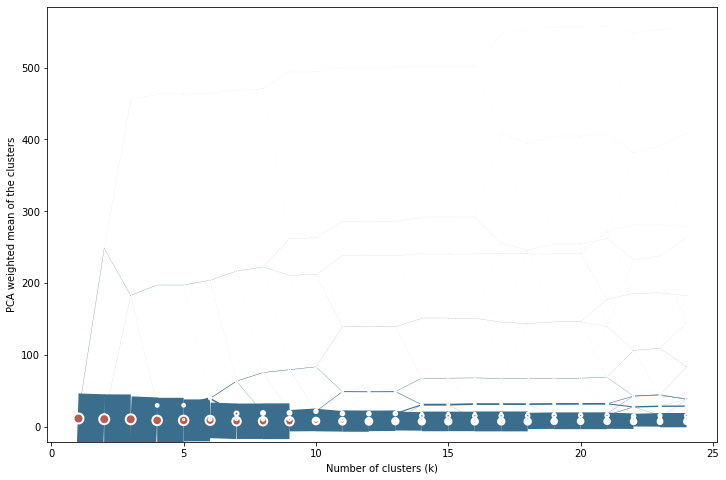

In [14]:
cgram.plot(
    figsize=(12, 8),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2
)

<AxesSubplot:>

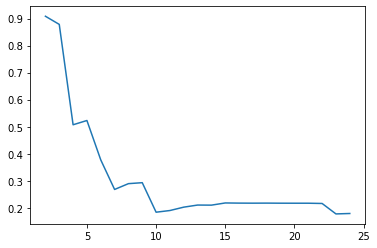

In [15]:
cgram.silhouette_score().plot()

<AxesSubplot:>

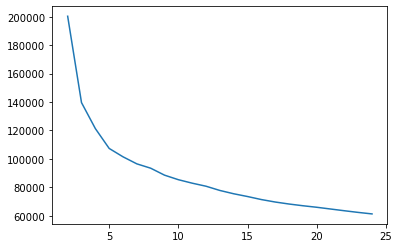

In [16]:
cgram.calinski_harabasz_score().plot()

<AxesSubplot:>

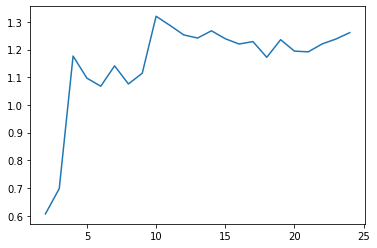

In [17]:
cgram.davies_bouldin_score().plot()

In [18]:
labels = cgram.labels.copy()
labels.columns = labels.columns.astype("str")  # parquet require str column names
labels.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c4_function_labels.pq")

In [19]:
import pickle

with open("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c4_function_centers.pickle",'wb') as f:
    pickle.dump(cgram.cluster_centers, f)

In [8]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c4_function_labels.pq")
labels.index = data4.index

In [9]:
centres = []
for i in range(103):
    geom = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/tessellation/tess_{i}.pq", columns=["tessellation", "hindex"]).set_index("hindex")
    geom = geom.merge(labels, how="inner", left_index=True, right_index=True)
    centres.append(geom)
    print(f"Chunk {i} done.")

Chunk 0 done.
Chunk 1 done.
Chunk 2 done.
Chunk 3 done.
Chunk 4 done.
Chunk 5 done.
Chunk 6 done.
Chunk 7 done.
Chunk 8 done.
Chunk 9 done.
Chunk 10 done.
Chunk 11 done.
Chunk 12 done.
Chunk 13 done.
Chunk 14 done.
Chunk 15 done.
Chunk 16 done.
Chunk 17 done.
Chunk 18 done.
Chunk 19 done.
Chunk 20 done.
Chunk 21 done.
Chunk 22 done.
Chunk 23 done.
Chunk 24 done.
Chunk 25 done.
Chunk 26 done.
Chunk 27 done.
Chunk 28 done.
Chunk 29 done.
Chunk 30 done.
Chunk 31 done.
Chunk 32 done.
Chunk 33 done.
Chunk 34 done.
Chunk 35 done.
Chunk 36 done.
Chunk 37 done.
Chunk 38 done.
Chunk 39 done.
Chunk 40 done.
Chunk 41 done.
Chunk 42 done.
Chunk 43 done.
Chunk 44 done.
Chunk 45 done.
Chunk 46 done.
Chunk 47 done.
Chunk 48 done.
Chunk 49 done.
Chunk 50 done.
Chunk 51 done.
Chunk 52 done.
Chunk 53 done.
Chunk 54 done.
Chunk 55 done.
Chunk 56 done.
Chunk 57 done.
Chunk 58 done.
Chunk 59 done.
Chunk 60 done.
Chunk 61 done.
Chunk 62 done.
Chunk 63 done.
Chunk 64 done.
Chunk 65 done.
Chunk 66 done.
Chunk

In [10]:
centres = pd.concat(centres)
centres

tessellation  1  2  3  \
hindex                                                                         
c000e109744t0003  POLYGON ((337347.176 427129.992, 337348.302 42...  0  0  0   
c000e109744t0004  POLYGON ((337387.051 427156.219, 337387.141 42...  0  0  0   
c000e109744t0005  POLYGON ((337407.393 427159.837, 337411.419 42...  0  0  0   
c000e109744t0006  POLYGON ((337411.419 427145.355, 337407.393 42...  0  0  0   
c000e109744t0002  POLYGON ((337340.875 427174.701, 337340.659 42...  0  0  0   
...                                                             ... .. .. ..   
c102e176011t0000  POLYGON ((389693.000 390509.000, 389670.270 39...  0  0  0   
c102e176013t0000  POLYGON ((389672.000 390555.000, 389686.500 39...  0  0  0   
c102e176012t0000  POLYGON ((389672.000 390555.000, 389664.500 39...  0  0  0   
c102e176029t0000  POLYGON ((389417.500 390623.500, 389435.420 39...  0  0  0   
c102e176030t0000  POLYGON ((389439.070 390699.570, 389449.040 39...  0  0  0   

                  4  5  6  7  8  9  ...  15  16  17  18  19  20  21  22  23  \
hindex                              ...                                       
c000e109744t0003  3  3  2  0  7  5  ...  14   8   5   2   6   6   4   5   8   
c000e109744t0004  3  3  2  0  7  5  ...  14   8   5   2   6   6   4   5   8   
c000e109744t0005  3  3  2  0  7  5  ...  14   8   5   2   6   6   4   5   8   
c000e109744t0006  3  3  2  0  7  5  ...  14   8   5   2   6   6   4   5   8   
c000e109744t0002  3  3  2  0  7  5  ...  14   8   5   2   6   6   4   5   8   
...              .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
c102e176011t0000  0  0  5  6  4  3  ...   5  15   1   0  17   5  20  20  16   
c102e176013t0000  0  0  5  6  4  3  ...   5  15   1   0  17   5  20  20  16   
c102e176012t0000  0  0  5  6  4  3  ...   5  15   1   0  17   5  20  20  16   
c102e176029t0000  0  0  5  6  4  3  ...   5  15   1   0  17   5  20  20  16   
c102e176030t0000  0  0  5  6  4  3  ...   5  15   1   0  17   5  20  20  16   

                  24  
hindex                
c000e109744t0003   9  
c000e109744t0004   9  
c000e109744t0005   9  
c000e109744t0006   9  
c000e109744t0002   9  
...               ..  
c102e176011t0000   1  
c102e176013t0000   1  
c102e176012t0000   1  
c102e176029t0000   1  
c102e176030t0000   1  

[336091 rows x 25 columns]

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve
import warnings 

warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

In [12]:
centres = centres.sort_values("10").rename_geometry("geometry")[["10", "geometry"]]
centres.columns = ["clusters", "geometry"]

In [13]:
ddf = dask_geopandas.from_geopandas(centres, npartitions=64)
spsig = dask_dissolve(ddf, by="clusters").compute().reset_index(drop=True).explode()
spsig

clusters                                           geometry
0 0           0  POLYGON Z ((530833.216 103904.196 0.000, 53077...
  1           0  POLYGON Z ((531380.341 105538.312 0.000, 53138...
  2           0  POLYGON Z ((531375.904 105582.515 0.000, 53137...
  3           0  POLYGON Z ((531435.569 105586.397 0.000, 53143...
  4           0  POLYGON Z ((530763.565 174182.075 0.000, 53076...
...         ...                                                ...
9 802         9  POLYGON Z ((288426.607 692711.173 0.000, 28842...
  803         9  POLYGON Z ((311520.247 723659.810 0.000, 31152...
  804         9  POLYGON Z ((273360.017 665324.324 0.000, 27336...
  805         9  POLYGON Z ((273616.954 665386.465 0.000, 27358...
  806         9  POLYGON Z ((266128.413 845196.609 0.000, 26612...

[6847 rows x 2 columns]

In [14]:
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster4_k10_function_GB.pq")

In [15]:
spsig.geometry = spsig.simplify(2).buffer(.001).simplify(2)
spsig.to_file(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster4_k10_function_GB_simplified.geojson", driver="GeoJSON")
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster4_k10_function_GB_simplified.pq")

In [16]:
spsig.to_file(f"sub_signatures_cluster4_k10_function_GB_simplified.gpkg", driver="GPKG")

## Sub-cluster cluster 0

In [18]:
data0 = data.loc[labels.k7 == 0]

In [24]:
data0

population_q1  population_q2  population_q3  \
hindex                                                          
c000e109777t0001      -0.208114       0.364186       0.274707   
c000e109777t0002      -0.142215       0.414750       0.298747   
c000e109777t0004      -0.114962       0.413013       0.298597   
c000e109777t0006      -0.142215       0.414581       0.298747   
c000e109777t0007      -0.148610       0.414750       0.307068   
...                         ...            ...            ...   
c102e174143t0000       2.121380       2.287164       1.937699   
c102e536902t0000       0.429903       0.446012       0.452081   
c102e220111t0000       0.442058       0.475928       0.437039   
c102e220091t0000       1.020223       0.823594       0.700069   
c102e220121t0000       0.236140       0.359030       0.410184   

                  night_lights_q1  night_lights_q2  night_lights_q3  \
hindex                                                                
c000e109777t0001        -0.385136        -0.411700        -0.456031   
c000e109777t0002        -0.404727        -0.431615        -0.450650   
c000e109777t0004        -0.409151        -0.446148        -0.456031   
c000e109777t0006        -0.404727        -0.431615        -0.450650   
c000e109777t0007        -0.390192        -0.411700        -0.428205   
...                           ...              ...              ...   
c102e174143t0000         0.887621         0.693851         0.416122   
c102e536902t0000        -0.016075        -0.129661        -0.228210   
c102e220111t0000        -0.016075        -0.189944        -0.293426   
c102e220091t0000        -0.102020        -0.189944        -0.342120   
c102e220121t0000        -0.319413        -0.189944        -0.335164   

                  A, B, D, E. Agriculture, energy and water_q1  \
hindex                                                           
c000e109777t0001                                     -0.971278   
c000e109777t0002                                     -0.891030   
c000e109777t0004                                     -0.887856   
c000e109777t0006                                     -0.891030   
c000e109777t0007                                     -0.897584   
...                                                        ...   
c102e174143t0000                                     -0.611660   
c102e536902t0000                                     -0.292452   
c102e220111t0000                                     -0.156623   
c102e220091t0000                                     -0.236947   
c102e220121t0000                                      0.267335   

                  A, B, D, E. Agriculture, energy and water_q2  \
hindex                                                           
c000e109777t0001                                     -0.729707   
c000e109777t0002                                     -0.694121   
c000e109777t0004                                     -0.694495   
c000e109777t0006                                     -0.694121   
c000e109777t0007                                     -0.719906   
...                                                        ...   
c102e174143t0000                                     -0.530448   
c102e536902t0000                                     -0.450964   
c102e220111t0000                                     -0.345044   
c102e220091t0000                                     -0.497512   
c102e220121t0000                                      0.637519   

                  A, B, D, E. Agriculture, energy and water_q3  \
hindex                                                           
c000e109777t0001                                     -0.463592   
c000e109777t0002                                     -0.466906   
c000e109777t0004                                     -0.466758   
c000e109777t0006                                     -0.467605   
c000e109777t0007                                     -0.461180   
...                                                        ...   
c1

In [ ]:
cgram2 = Clustergram(range(1, 25), method='minibatchkmeans', n_init=1000, batch_size=250_000, random_state=42)
cgram2.fit(data0)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 1119.9726717472076 seconds.
K=3 fitted in 1239.4531908035278 seconds.
K=4 fitted in 1340.0616781711578 seconds.
K=5 fitted in 1450.7089176177979 seconds.
K=6 fitted in 1551.5913639068604 seconds.
K=7 fitted in 2213.917969226837 seconds.
K=8 fitted in 2416.2278904914856 seconds.
K=9 fitted in 2529.102439880371 seconds.
K=10 fitted in 2648.996196269989 seconds.
K=11 fitted in 2765.8127110004425 seconds.
K=12 fitted in 2859.472891330719 seconds.
K=13 fitted in 2964.969277381897 seconds.
K=14 fitted in 3069.9570531845093 seconds.
K=15 fitted in 3179.3157906532288 seconds.
K=16 fitted in 3374.6701805591583 seconds.
K=17 fitted in 3503.384238243103 seconds.


In [26]:
import urbangrammar_graphics as ugg
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [27]:
fig = cgram2.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2
)
show(fig)

In [28]:
fig = cgram2.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2,
    pca_weighted=False,
)
show(fig)

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

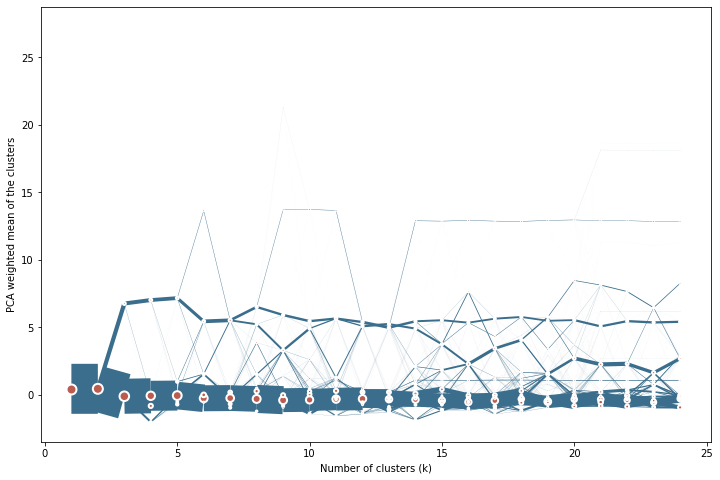

In [29]:
cgram2.plot(
    figsize=(12, 8),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2
)

In [31]:
cgram2.silhouette_score(sample_size=100_000).plot()

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

<AxesSubplot:>

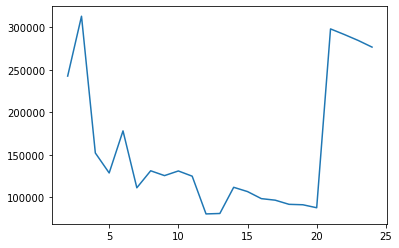

In [32]:
cgram2.calinski_harabasz_score().plot()

<AxesSubplot:>

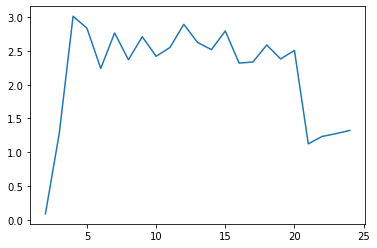

In [33]:
cgram2.davies_bouldin_score().plot()

In [34]:
labels2 = cgram2.labels.copy()
labels2.columns = labels2.columns.astype("str")  # parquet require str column names
labels2.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c0_function_labels.pq")

In [35]:
import pickle

with open("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c0_function_centers.pickle",'wb') as f:
    pickle.dump(cgram.cluster_centers, f)

In [19]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c0_function_labels.pq")
labels.index = data0.index

In [20]:
centres = []
for i in range(103):
    geom = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/tessellation/tess_{i}.pq", columns=["tessellation", "hindex"]).set_index("hindex")
    geom = geom.merge(labels, how="inner", left_index=True, right_index=True)
    centres.append(geom)
#     print(f"Chunk {i} done.")

In [21]:
centres = pd.concat(centres)
centres

tessellation  1  2  3  \
hindex                                                                         
c000e109777t0001  POLYGON ((336192.633 427056.666, 336192.607 42...  0  0  0   
c000e109777t0002  POLYGON ((336202.056 427028.254, 336199.483 42...  0  0  0   
c000e109777t0004  POLYGON ((336220.377 427052.195, 336218.829 42...  0  0  0   
c000e109777t0006  POLYGON ((336270.524 427056.284, 336270.988 42...  0  0  0   
c000e109777t0007  POLYGON ((336261.120 426985.085, 336260.426 42...  0  0  0   
...                                                             ... .. .. ..   
c102e174143t0000  POLYGON ((389579.000 395340.000, 389587.800 39...  0  0  0   
c102e536902t0000  POLYGON ((401240.000 395746.000, 401219.000 39...  0  0  0   
c102e220111t0000  POLYGON ((401577.000 396114.000, 401571.860 39...  0  0  0   
c102e220091t0000  POLYGON ((402112.440 396148.780, 402126.770 39...  0  0  0   
c102e220121t0000  POLYGON ((401642.000 396971.000, 401631.000 39...  0  0  0   

                  4  5  6  7  8  9  ...  15  16  17  18  19  20  21  22  23  \
hindex                              ...                                       
c000e109777t0001  0  0  1  0  5  7  ...  13  15   8  15  18   9   6  20  10   
c000e109777t0002  0  0  1  0  5  7  ...  13  15   8  15  18   9   6  20  10   
c000e109777t0004  0  0  1  0  5  7  ...  13  15   8  15  18   9   6  20  10   
c000e109777t0006  0  0  1  0  5  7  ...  13  15   8  15  18   9   6  20  10   
c000e109777t0007  0  0  1  0  5  7  ...  13  15   8  15  18   9   6  20  10   
...              .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
c102e174143t0000  0  0  0  2  0  0  ...  11  11   3   8   7  14  14  15   6   
c102e536902t0000  0  0  5  1  6  3  ...   0  14   5   0   8  16   7   0   1   
c102e220111t0000  0  0  5  2  6  3  ...   8  14   5   0   8  16   7   0   1   
c102e220091t0000  0  0  5  2  6  0  ...   8  14   0  11   8  16   7   0   1   
c102e220121t0000  0  0  5  1  2  3  ...   0  14   5   0   8  10   7   0   1   

                  24  
hindex                
c000e109777t0001  10  
c000e109777t0002  10  
c000e109777t0004  10  
c000e109777t0006  10  
c000e109777t0007  10  
...               ..  
c102e174143t0000  11  
c102e536902t0000   3  
c102e220111t0000   3  
c102e220091t0000   3  
c102e220121t0000   3  

[4040688 rows x 25 columns]

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve
import warnings 

warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

In [22]:
centres = centres.sort_values("6").rename_geometry("geometry")[["6", "geometry"]]
centres.columns = ["clusters", "geometry"]

In [23]:
ddf = dask_geopandas.from_geopandas(centres, npartitions=64)
spsig = dask_dissolve(ddf, by="clusters").compute().reset_index(drop=True).explode()
spsig

clusters                                           geometry
0 0            0  POLYGON Z ((560121.918 97211.634 0.000, 560121...
  1            0  POLYGON Z ((559974.823 97330.997 0.000, 559974...
  2            0  POLYGON Z ((559619.895 97374.969 0.000, 559619...
  3            0  POLYGON Z ((560247.409 98085.031 0.000, 560248...
  4            0  POLYGON Z ((560121.666 98079.843 0.000, 560123...
...          ...                                                ...
5 5362         5  POLYGON Z ((345984.205 751366.135 0.000, 34598...
  5363         5  POLYGON Z ((342260.266 865598.519 0.000, 34226...
  5364         5  POLYGON Z ((342373.066 865666.244 0.000, 34237...
  5365         5  POLYGON Z ((342634.647 865740.155 0.000, 34263...
  5366         5  POLYGON Z ((343119.757 865965.342 0.000, 34312...

[56153 rows x 2 columns]

In [14]:
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster0_k6_function_GB.pq")

In [24]:
spsig.geometry = spsig.simplify(2).buffer(.001).simplify(2)
spsig.to_file(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster0_k6_function_GB_simplified.geojson", driver="GeoJSON")
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster0_k6_function_GB_simplified.pq")

In [25]:
spsig.to_file(f"sub_signatures_cluster0_k6_function_GB_simplified.gpkg", driver="GPKG")